# Task-3 : Prediction Using Decision Tree Algorithm

### Loading Data

In [3]:
# The code was removed by Watson Studio for sharing.

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier

In [5]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Columns: 6 entries, Id to Species
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df.shape

(150, 6)

In [9]:
df.rename(columns={'SepalLengthCm':'Sepal_length','SepalWidthCm':'Sepal_width','PetalLengthCm':'Petal_length','PetalWidthCm':'Petal_width'},inplace=True)
df.head()

,Id,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Setting Feature and Target Variables

In [10]:
X=df[['Sepal_length','Sepal_width','Petal_length','Petal_width']].values
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [11]:
Y=df['Species']
Y[0:5]

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

### Splitting Training and Testing data

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

In [13]:
print("X training set : {}".format(x_train.shape))
print("Y training set : {}".format(y_train.shape))

X training set : (112, 4)
Y training set : (112,)


In [14]:
print("X testing set : {}".format(x_test.shape),' & Y testing set : {}'.format(y_test.shape))

X testing set : (38, 4)  & Y testing set : (38,)


In [15]:
species=DecisionTreeClassifier(criterion='entropy', max_depth=5)
species

DecisionTreeClassifier(criterion='entropy', max_depth=5)

### Training the model

In [16]:
species.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

### Making predictions

In [17]:
yhat=species.predict(x_test)

In [18]:
print(yhat[0:5])
print(y_test[0:5])

['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica']
14         Iris-setosa
98     Iris-versicolor
75     Iris-versicolor
16         Iris-setosa
131     Iris-virginica
Name: Species, dtype: object


### Model Accuracy

In [19]:
from sklearn import metrics
print("Decision Tree's accuracy: ", metrics.accuracy_score(y_test,yhat))

Decision Tree's accuracy:  0.9736842105263158


### Model Visualization

In [20]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.8-main

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2021.5.30          |   py38h578d9bd_0         141 KB  conda-forge
    openssl-1.1.1k             |       h7f98852_0         2.1 MB  conda-forge
    pydotplus-2.0.2            |             py_1          22 KB  conda-forge
    python_abi-3.8             |           2_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.3 MB

The following NEW packages will be INSTALLED:

  pydotplus          conda-forge/noarch::pydotplus-2.0.2-py_1
  python_abi         conda-forge/linux-64::python_abi-3.8-2_cp38

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi         

In [28]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

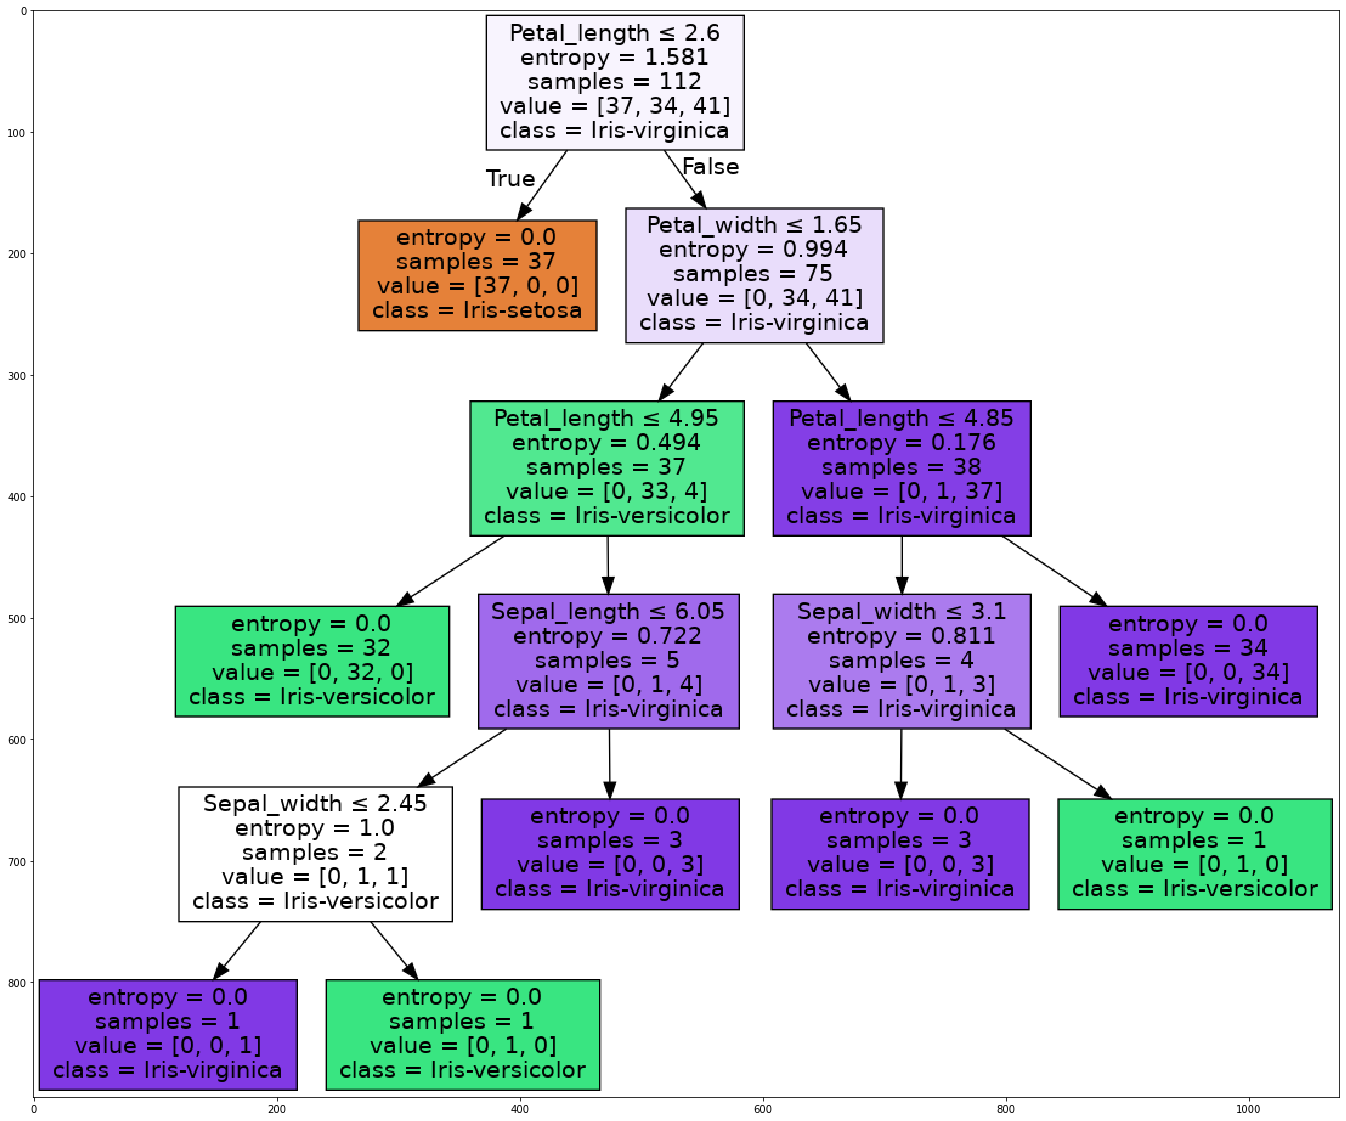

In [39]:
dot_data = StringIO()
filename = "species.png"
featureNames = df.columns[1:5]
out=tree.export_graphviz(species,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(40,20))
plt.imshow(img,interpolation='nearest')